# Breast Cancer Prediction

In this project, we will be predicting whether a patient has breast cancer based on the features of the cell nucleus.

<b> Importing Libraries <b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file_path = '/Users/monicaleo/Downloads/breast.csv'

In [3]:
bc = pd.read_csv(file_path)

In [4]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<font size="4"> <b> Exploratory Data Analysis </font> <b>

In [5]:
bc.shape

(569, 33)

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
bc.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


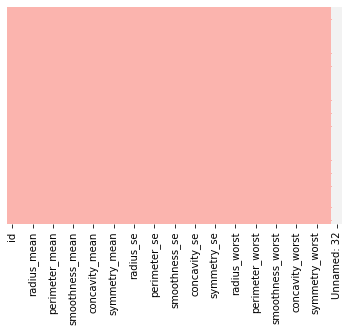

In [9]:
sns.heatmap(bc.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')

From the above heatmap, we can see that the column 'Unnamed' has all its values missing. So, we will have to remove that column.

In [10]:
bc.drop('Unnamed: 32',axis=1,inplace=True)

In [11]:
bc.shape

(569, 32)

Column is removed!

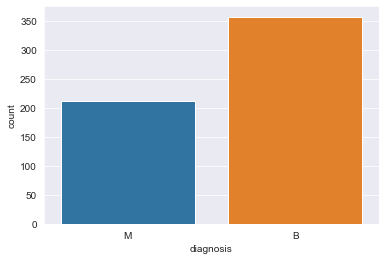

In [12]:
sns.set_style("darkgrid")
sns.countplot(x='diagnosis',data=bc)

In [13]:
bc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Since diagnosis is a categorical value, we will have to encode it.

In [14]:
#encoding categorical data values
# 1 = M, 0 = B
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
bc.iloc[:,1] = labelencoder.fit_transform(bc.iloc[:,1].values)

bc.iloc[:,1]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

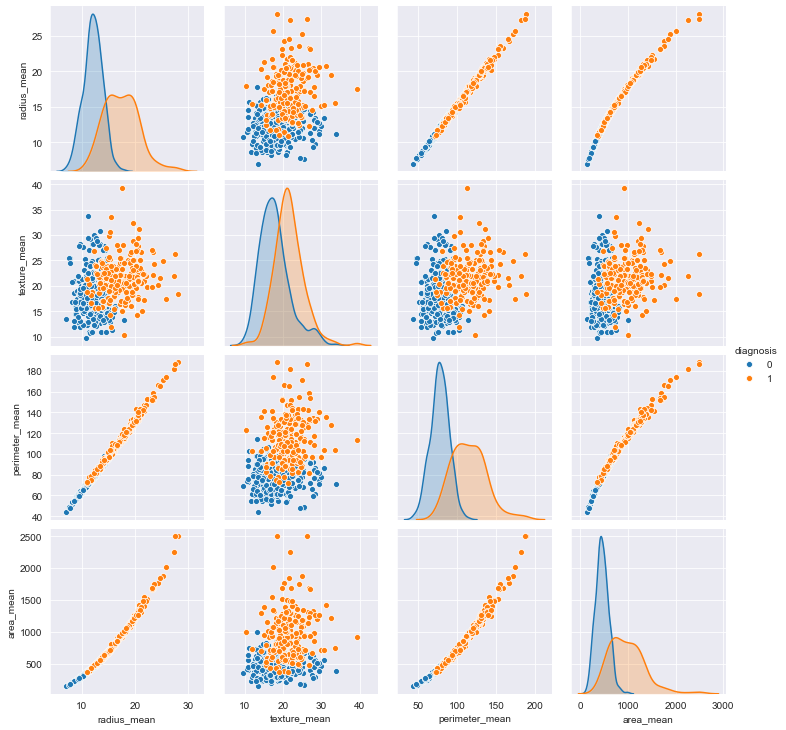

In [15]:
sns.pairplot(bc.iloc[:,1:6], hue = 'diagnosis')

In [16]:
bc.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


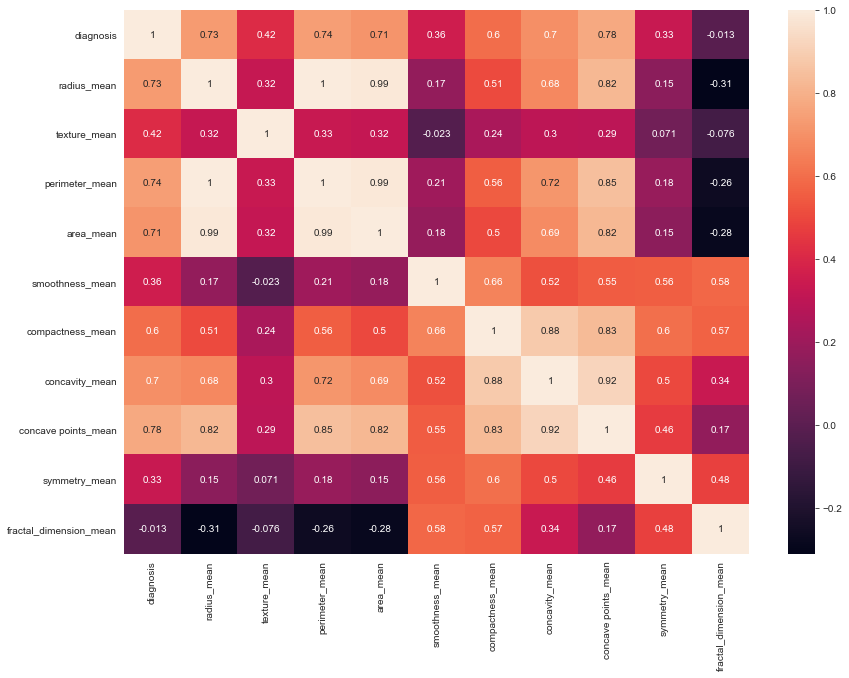

In [17]:
plt.figure(figsize=(14,10))
sns.heatmap(bc.iloc[:,1:12].corr(), annot=True)

<font size="4"> <b> Splitting and Scaling the Data </font> <b>

In [18]:
X = bc.iloc[:,2:31].values
Y = bc.iloc[:,1].values

In [19]:
# Train-test split 30-70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, 
                                                    random_state=101)

In [20]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<font size="4"> <b> Models and Accuracy </font> <b>

In [50]:
def models(X_train,y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)
    
    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    decision_tree.fit(X_train, y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
    random_forest.fit(X_train, y_train)
    
    #Model Accuracy on Training Data
    print('[0]Logistic Regression Training Acc:', log.score(X_train,y_train))
    print('[1]Decision Tree Training Acc:', decision_tree.score(X_train,y_train))
    print('[2]Random Forest Training Acc:', random_forest.score(X_train,y_train))
    
    return log, decision_tree, random_forest


In [51]:
model = models(X_train,y_train)

[0]Logistic Regression Training Acc: 0.9874371859296482
[1]Decision Tree Training Acc: 1.0
[2]Random Forest Training Acc: 0.992462311557789


In [52]:
# Acc on Testing Data
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    print('Model ', i)
    cm = confusion_matrix(y_test, model[i].predict(X_test))

    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[1][0]
    fn = cm[0][1]

    print(cm)
    print('Testing Acc = ', (tp + tn)/(tp +tn +fn + fp))
    print()

Model  0
[[105   0]
 [  3  63]]
Testing Acc =  0.9824561403508771

Model  1
[[100   5]
 [  7  59]]
Testing Acc =  0.9298245614035088

Model  2
[[102   3]
 [  7  59]]
Testing Acc =  0.9415204678362573



<font size="4"> <b> Predictions </font> <b>

In [53]:
# Logistic Regression
pred = model[0].predict(X_test)
print(pred)
print()
print(y_test)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0]

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1]


In [54]:
# Decision Tree
pred = model[1].predict(X_test)
print(pred)
print()
print(y_test)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0]

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1]


In [55]:
# Random Forest
pred = model[1].predict(X_test)
print(pred)
print()
print(y_test)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0]

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1]
